In [57]:
from sklearn.datasets import make_regression
import numpy as np 

In [58]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

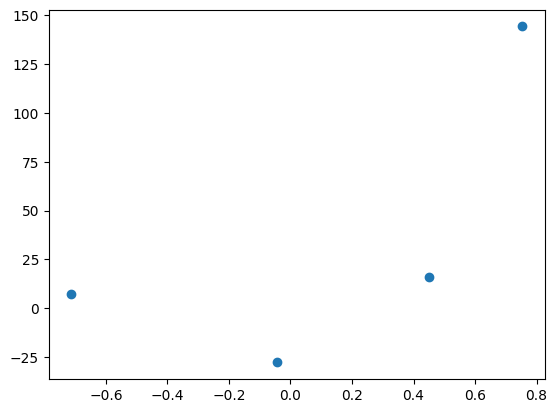

In [59]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [60]:
from sklearn.linear_model import LinearRegression


In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X,y)

LinearRegression()

In [63]:
lr.coef_

array([78.35063668])

In [64]:
lr.intercept_

np.float64(26.15963284313262)

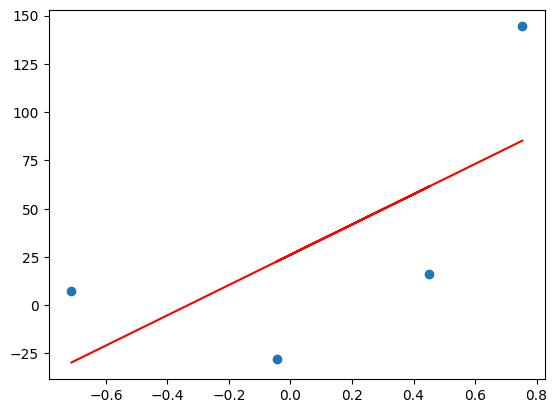

In [65]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [66]:
# let us assume the starting value of b is 0
# Lets apply Gradient Descent assuming slope is constant m = 78.35
y_pred = ((78.35*X) + 0).reshape(4)

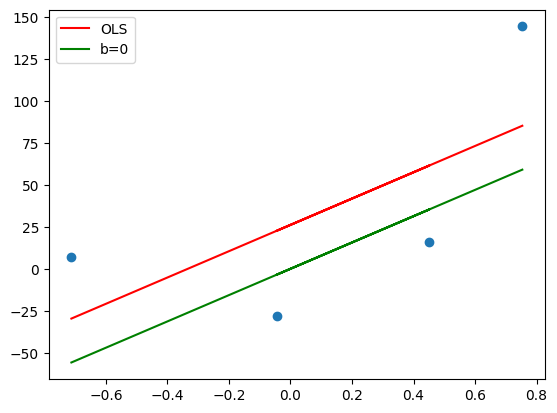

In [67]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [68]:
m = 78.35
b = 0
loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-209.27763408209216)

In [69]:
#lets take the learning rate 0.1
learnrate = 0.1
stepsize = learnrate*loss_slope
stepsize

np.float64(-20.927763408209216)

In [70]:
# calculating the new intercept
b = b-stepsize
b

np.float64(20.927763408209216)

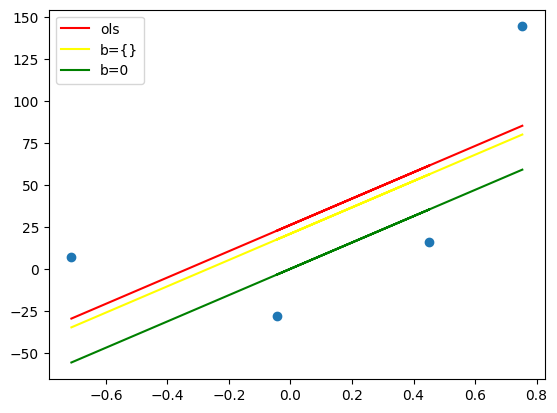

In [71]:
y_pred1 = (78.35*X + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='ols')
plt.plot(X,y_pred1,color='yellow',label='b={}')
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [72]:
loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

np.float64(-41.85552681641843)

In [73]:
step_size = loss_slope*learnrate
step_size

np.float64(-4.185552681641844)

In [74]:
b = b-step_size
b

np.float64(25.11331608985106)

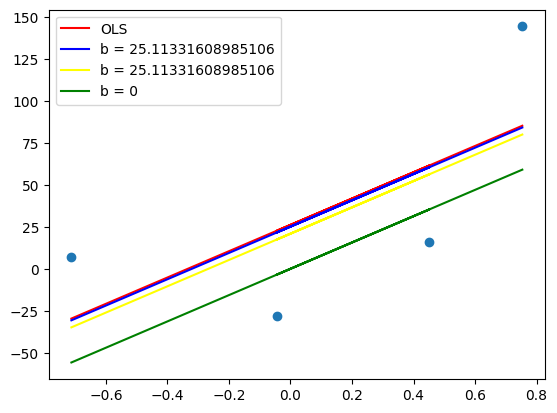

In [75]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='blue',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='yellow',label='b = {}'.format(b))
plt.plot(X,y_pred,color='green',label='b = 0')
plt.legend()
plt.show()

In [76]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-8.371105363283675)

In [77]:
step_size = loss_slope*learnrate
step_size

np.float64(-0.8371105363283675)

In [78]:
b = b-step_size
b

np.float64(25.95042662617943)

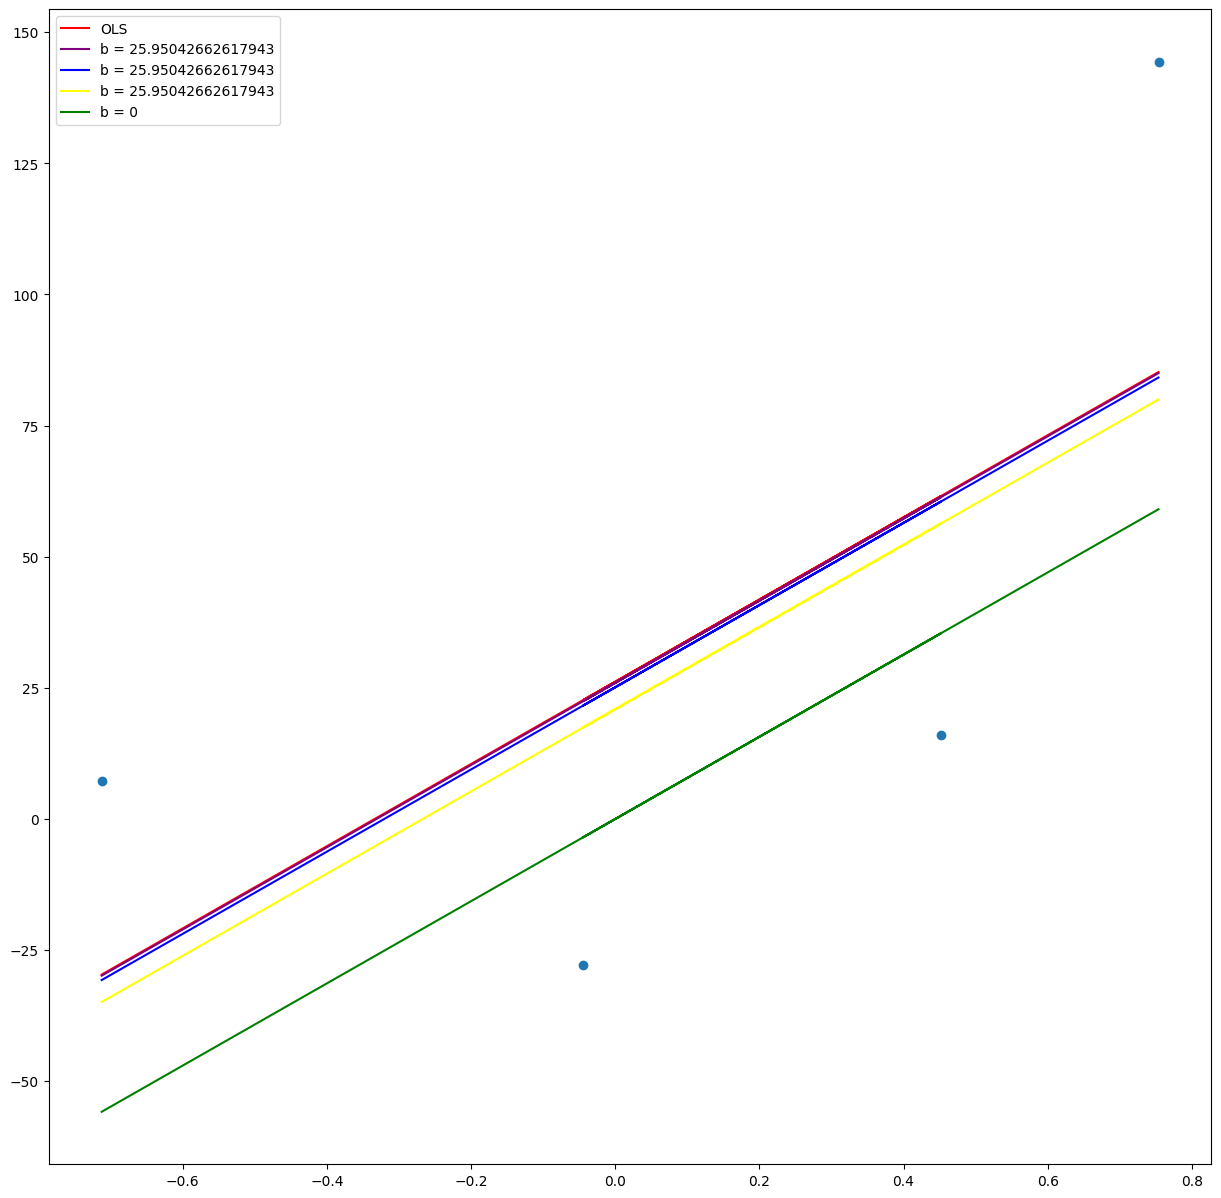

In [79]:
y_pred3 = ((78.35 * X) + b).reshape(4)
plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='purple',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='blue',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='yellow',label='b = {}'.format(b))
plt.plot(X,y_pred,color='green',label='b = 0')
plt.legend()
plt.show()

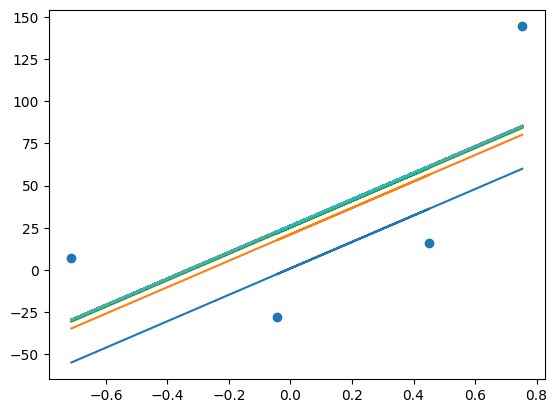

In [80]:
b = -100
m = 78.35
learnrate = 0.1
epochs = 100

for i in range(epochs):
    loss_slope = -2*np.sum(y-m*X.ravel()-b)
    b = b-(learnrate*loss_slope)
    y_pred = m*X + b
    plt.plot(X,y_pred)

plt.scatter(X,y)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X,y)

LinearRegression()

In [85]:
print(lr.coef_)
print(lr.intercept_)

[78.35063668]
26.15963284313262


In [97]:
class GDregressor:
    def __init__(self,learning_rate,epochs):
        self.m = 78.35
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2*np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)
        print(self.m,self.b)
    def predict(self,X):
        return self.m*X +self.b

In [98]:
gd = GDregressor(0.1,30)

In [99]:
gd.fit(X,y)

78.35627762483378 26.158725791782206


In [100]:
gd.predict(X)

array([[-29.6615547 ],
       [ 61.56105884],
       [ 22.67163023],
       [ 85.22105342]])